# Figure 3

In [1]:
%load_ext autoreload
%autoreload 2

from flyvis import EnsembleView

In [2]:
ensemble = EnsembleView("flow/0000")

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-12-08 19:44:37] ensemble:166 Loaded 50 networks.


## a

In [3]:
task_error = ensemble.task_error()

In [4]:
embedding_and_clustering = ensemble.clustering("T4c")

[2024-12-08 19:44:39] clustering:835 Loaded T4c embedding and clustering from /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/umap_and_clustering


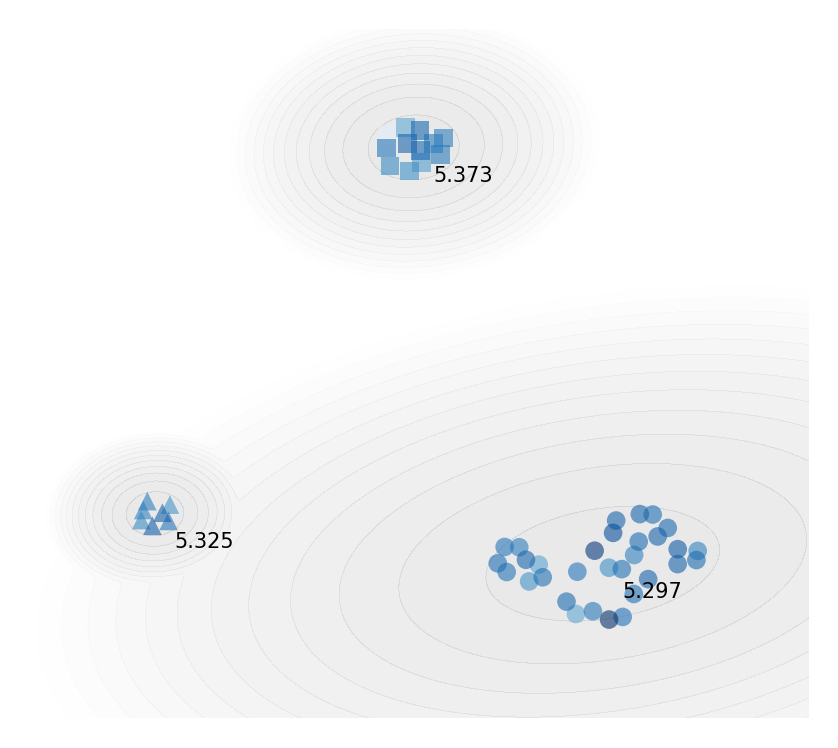

In [5]:
embeddingplot = embedding_and_clustering.plot(
    task_error=task_error.values, colors=task_error.colors
)

## b

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from flyvis.analysis.visualization import plt_utils
from flyvis.analysis.moving_bar_responses import plot_angular_tuning

In [7]:
cluster_indices = ensemble.cluster_indices("T4c")

In [8]:
r = ensemble.moving_edge_responses()
r['responses'] /= np.abs(r['responses']).max(dim=('frame', 'sample'))

/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e236e47b9a57dc6d7b692906aca84495/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2a1519d1c3b8bf0d0776e8ff2618353d/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/787654b3c56e4015939e72adfa768448/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/9d4697cbfdcda0d4b910d26a3f48a2dd/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/546ffb3b9036631dbb8bc4f2d8c3639f/output.h5
/groups/turaga/home/lappalainenj/FlyVis/priva

In [9]:
cluster_indices = ensemble.cluster_indices("T4c")

In [10]:
colors = ensemble.task_error().colors

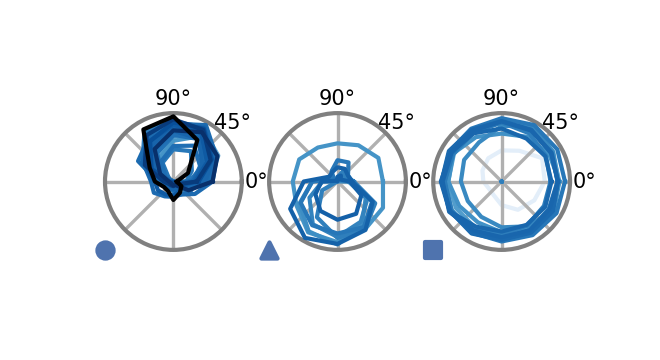

In [11]:
fig, axes = plt.subplots(
    1, len(cluster_indices), subplot_kw={"projection": "polar"}, figsize=[2, 1]
)
for cluster_id, indices in cluster_indices.items():
    plot_angular_tuning(
        r.sel(network_id=indices),
        "T4c",
        intensity=1,
        colors=colors[indices],
        zorder=ensemble.zorder()[indices],
        groundtruth=True if cluster_id == 0 else False,
        fig=fig,
        ax=axes[cluster_id],
    )
    plt_utils.add_cluster_marker(
        fig, axes[cluster_id], marker=plt_utils.get_marker(cluster_id)
    )

## e

/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d9d302eebb41d955bb76dcf9d6ce623a/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/13f5d9136003d68fa860867f0ed89c64/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6ec38263ed72b3a302f55bd519d68643/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/048c1466b844b8be367b875fab782256/output.h5
/groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/results/flow/0000/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/561c8275f604bf5964ebd8efa2ab0838/output.h5
/groups/turaga/home/lappalainenj/FlyVis/priva

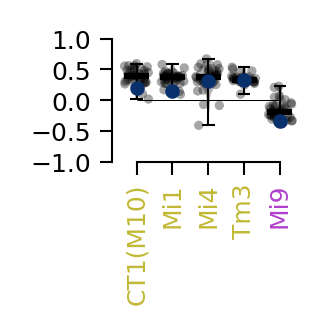

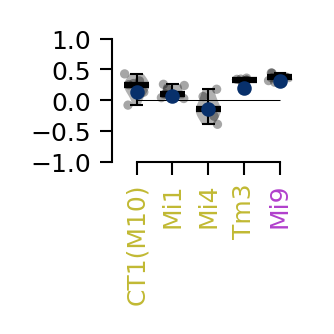

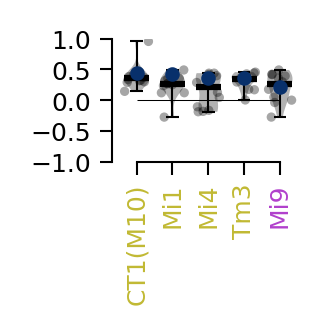

In [12]:
for cluster_id, indices in cluster_indices.items():
    with ensemble.select_items(indices):
        fig, ax = ensemble.flash_response_index(
            cell_types=["Mi1", "Tm3", "Mi4", "Mi9", "CT1(M10)"], figsize=[1, 1]
        )